<a href="https://colab.research.google.com/github/jferx/modelado-y-simulacion/blob/flujo-en-la-linea/PenduloInver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis no lineal de un péndulo invertido**

**Introducción:**

El mecanismo de carro de péndulo invertido (IPCM) fue puesto por primera vez en un ejercicio práctico en Gran Bretaña por los sismólogos para diseñar el sismómetro en el año 1840. El comportamiento caótico exhibido por ellos hizo un buen modelo para el estudio de las "vibraciones" producidas durante los terremotos

El análisis no lineal de sistemas de péndulos invertidos es necesario para manipuladores robóticos y
para locomoción bípeda, ya que por medio de estos análisis se pueden generar mejores estrategias de
control que presenten una mejor dinámica y un mejor comportamiento del sistema frente a cambios
y perturbaciones.

su análisis presenta una variedad de comportamientos complejos,
característica de los sistemas no lineales, tales como múltiples puntos de equilibrio, ciclos limites,
escape de tiempo finito, bifurcaciones y caos entre otros. 

**Sistema de pendulo invertido**


Supongamos un sistema de péndulo invertido de la siguiente forma: 

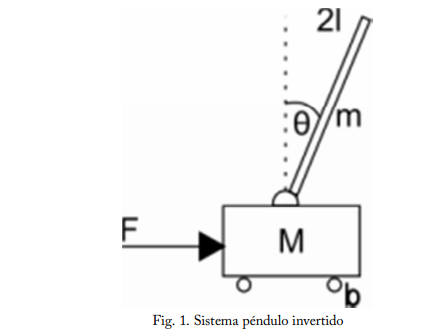



A través de las ecuaciones de Lagrange llegamos a las ecuaciones que rigen el sistema:

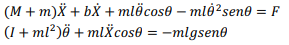


Una vez se tienen
estas ecuaciones, es necesario despejar la variable de mayor orden. En este caso suponemos
que la masa del péndulo está concentrada en el extremo de la barra de tal forma que la inercia de la
barra es 0. 


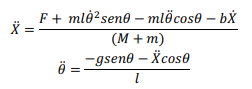


Para obtener las ecuaciones reales del sistema, reemplazamos cada ecuación en la otra, para así
obtener ecuaciones que no dependan de su variable de mayor orden. Las ecuaciones resultantes son:


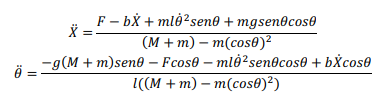


Una vez se tienen estas dos ecuaciones, se convierten a variables de estado, definiendo las variables
de estado como:


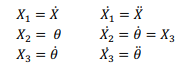


Teniendo como base estas variables de estado se procede a reemplazar los términos anteriores en las
ecuaciones anteriores y así obtener las ecuaciones de variables de estado:


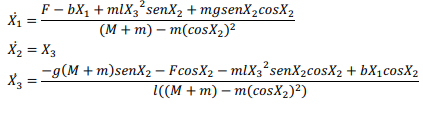


Por medio de identidades trigonométricas, estas ecuaciones pueden reescribirse de la siguiente
forma:


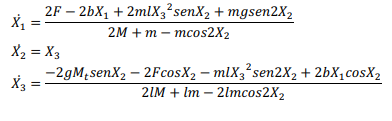

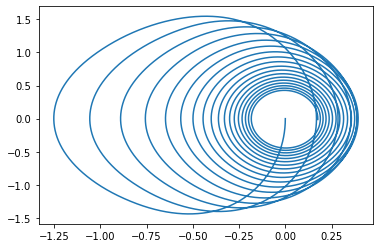

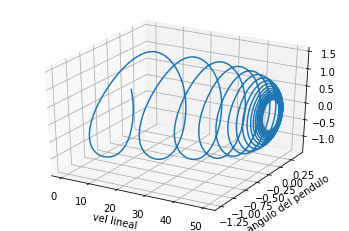

In [ ]:
from sympy.solvers import nonlinsolve
import numpy as np
from numpy import sin,cos
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp


#from clases import *
#-----------------------parametros especificos
m=2 #masa del pendulo
M=5 #masa del carro
l=3  #longitud del pendulo
F=50
b=1
g=9.81

def xx1(t,y):
  return [((2*F)-(2*b*y[0])+(2*m*l*(y[2]**2)*sin(y[1]))+(m*g*sin(2*y[1])))/((2*M)+(m)-(m*cos(2*y[1]))),y[2],((-2*g*(M+m)*sin(y[1]))-(2*F*cos(y[1]))-(m*l*(y[2]**2)*sin(2*y[1]))+(2*b*y[0]*cos(y[1])))/((2*l*M)+(l*m)-(2*l*m*(cos(2*y[1]))))]
def solucion(y):
  a,c=0,50
  y0=[0,0,0]
  t=np.linspace(a,c,100000)

  sol=solve_ivp(xx1,[a,c],y0,t_eval=t)
  plt.plot(sol.y[1],sol.y[2])
  plt.show()
  mx = plt.axes(projection='3d')
  return mx.plot3D(sol.y[0], sol.y[1], sol.y[2])
  
for i in [b]:
  plt.figure()
  solucion(1)
  plt.xlabel('vel lineal')
  plt.ylabel('angulo del pendulo')
  


**Obtención de los puntos de equilibrio:** 

Como se puede apreciar en las ecuaciones anteriores, no hay un término que indique la posición en
variables de estado. Esto es debido a que el sistema mecánico no tiene ninguna restricción que haga
que su comportamiento dependa de la posición lineal en la que se encuentra. Los puntos de
equilibrio se hallan si se aplica la siguiente formulación: 


image.png

 El primer punto es $(F/b, 0, 0)$, esto resulta cuando la variable de la velocidad lineal del sistema

$X_1=F/b$ la variable que indica el angulo del péndulo $X_2= 0$ y la variable que indica la velocidad
angular del sistema $X_3 = 0$.
El segundo punto de equilibrio es $(F/b, pi, 0)$, en donde la única
variable que cambia es la variable $x_2=pi$. Esto quiere decir que el otro punto de equilibrio del
sistema es cuando el ángulo del péndulo es pi radianes, y las otras variables son iguales a las
condiciones del punto de equilibrio anterior.

 Mecánicamente en el modelo se puede observar que
estos dos puntos de equilibrio son factibles, ya que el primer punto de equilibrio es cuando el
péndulo está en su posición vertical hacia abajo, sin ninguna velocidad angular y la fuerza es igual a
la fricción. El segundo punto muestra este mismo comportamiento pero el péndulo está en su
posición vertical hacia arriba. 

A continuación se puede observar los diagramas de fases de cada uno de los puntos de
equilibrio variando algunos parametros:

[0, 0, 0]
[100, 0, 1.5]


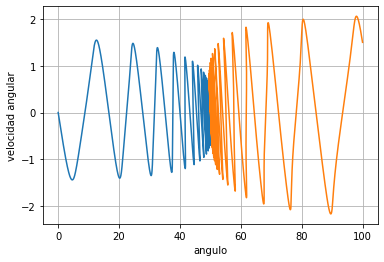

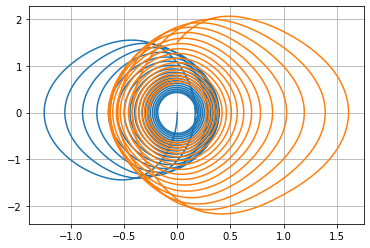

In [ ]:
b=1
a,c=0,50
y0=[0,0,0]
t=np.linspace(a,c,10000)
print(y0)
sol=solve_ivp(xx1,[a,c],y0,t_eval=t)

y0=[100,0,1.5]
t=np.linspace(a,c,10000)
print(y0)
sol2=solve_ivp(xx1,[a,c],y0,t_eval=t)

plt.plot(sol.y[0], sol.y[2],sol2.y[0], sol2.y[2])
plt.xlabel('angulo')
plt.ylabel('velocidad angular')
plt.grid()
plt.show()


plt.plot(sol.y[1], sol.y[2],sol2.y[1], sol2.y[2])
plt.grid()


**Cuando la friccion es variable**

[0, 0, 0]
[0, 0, 0]


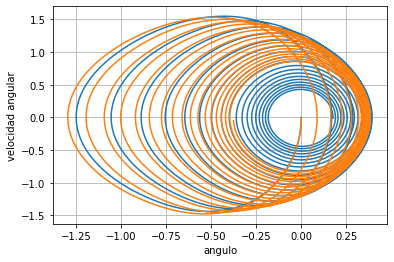

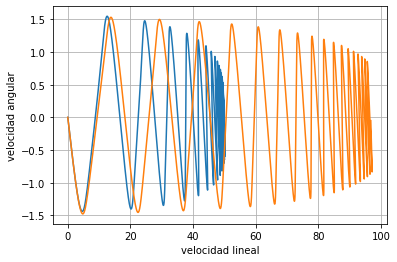

In [ ]:
from math import pi,radians
b=1
a,c=0,50
y0=[0,0,0]
t=np.linspace(a,c,10000)
print(y0)
sol=solve_ivp(xx1,[a,c],y0,t_eval=t)
b=0.5
y0=[0,0,0]
t=np.linspace(a,c,10000)
print(y0)
sol2=solve_ivp(xx1,[a,c],y0,t_eval=t)


plt.plot(sol.y[1], sol.y[2],sol2.y[1], sol2.y[2])
plt.xlabel('angulo')
plt.ylabel('velocidad angular')
plt.grid()
plt.show()
plt.plot(sol.y[0], sol.y[2],sol2.y[0], sol2.y[2])
plt.xlabel('velocidad lineal')
plt.ylabel('velocidad angular')
plt.grid()


**cuando la fuerza es variable**

[0, 0, 0]
[0, 0.027415567780803774, 0]


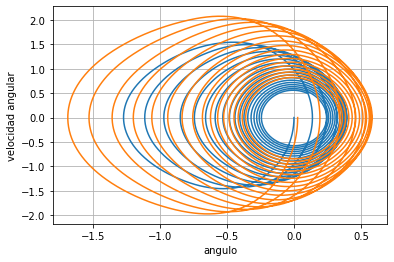

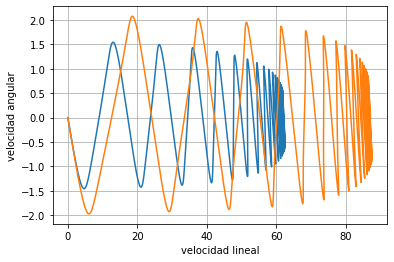

In [ ]:
F=50
b=0.8
a,c=0,50
y0=[0,0,0]
t=np.linspace(a,c,10000)
print(y0)
sol=solve_ivp(xx1,[a,c],y0,t_eval=t)
F=70
y0=[0,radians(pi/2),0]
t=np.linspace(a,c,10000)
print(y0)
sol2=solve_ivp(xx1,[a,c],y0,t_eval=t)


plt.plot(sol.y[1], sol.y[2],sol2.y[1], sol2.y[2])
plt.xlabel('angulo')
plt.ylabel('velocidad angular')
plt.grid()
plt.show()
plt.plot(sol.y[0], sol.y[2],sol2.y[0], sol2.y[2])
plt.xlabel('velocidad lineal')
plt.ylabel('velocidad angular')
plt.grid()



**cuando la longitud es variable**

[0, 0, 0]
[0, 0.027415567780803774, 0]


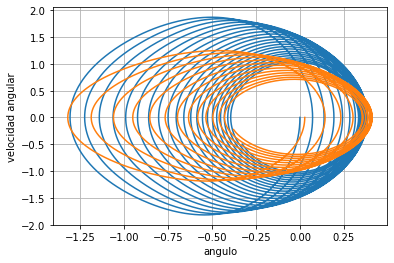

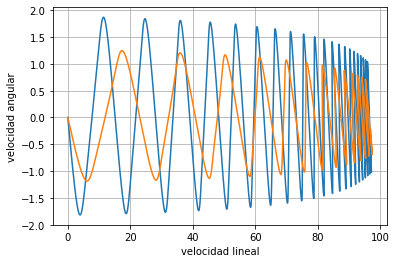

In [ ]:
b=0.5
F=50
l=2
a,c=0,50
y0=[0,0,0]
t=np.linspace(a,c,10000)
print(y0)
sol=solve_ivp(xx1,[a,c],y0,t_eval=t)
l=5
y0=[0,radians(pi/2),0]
t=np.linspace(a,c,10000)
print(y0)
sol2=solve_ivp(xx1,[a,c],y0,t_eval=t)


plt.plot(sol.y[1], sol.y[2],sol2.y[1], sol2.y[2])
plt.xlabel('angulo')
plt.ylabel('velocidad angular')
plt.grid()
plt.show()
plt.plot(sol.y[0], sol.y[2],sol2.y[0], sol2.y[2])
plt.xlabel('velocidad lineal')
plt.ylabel('velocidad angular')
plt.grid()



**Cuando la masa del pendulo es variable**

[0, 0, 0]
[0, 0.027415567780803774, 0]


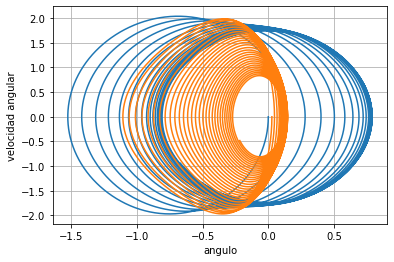

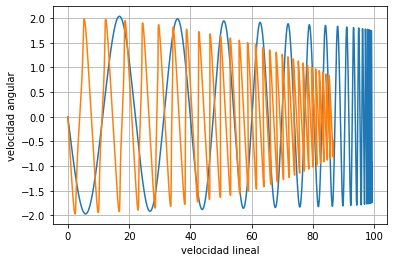

In [ ]:
b=0.5
F=50
m=0.1
l=2
a,c=0,50
y0=[0,0,0]
t=np.linspace(a,c,10000)
print(y0)
sol=solve_ivp(xx1,[a,c],y0,t_eval=t)
m=5
y0=[0,radians(pi/2),0]
t=np.linspace(a,c,10000)
print(y0)
sol2=solve_ivp(xx1,[a,c],y0,t_eval=t)


plt.plot(sol.y[1], sol.y[2],sol2.y[1], sol2.y[2])
plt.xlabel('angulo')
plt.ylabel('velocidad angular')
plt.grid()
plt.show()
plt.plot(sol.y[0], sol.y[2],sol2.y[0], sol2.y[2])
plt.xlabel('velocidad lineal')
plt.ylabel('velocidad angular')
plt.grid()

**Cuando la masa del carro es variable**

[0, 0, 0]
[0, 0.027415567780803774, 0]


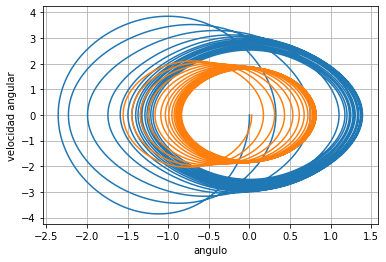

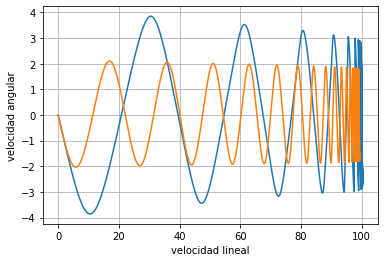

In [ ]:
b=0.5
F=50
m=0.1
l=2
M=2
a,c=0,50
y0=[0,0,0]
t=np.linspace(a,c,10000)
print(y0)
sol=solve_ivp(xx1,[a,c],y0,t_eval=t)
M=5
y0=[0,radians(pi/2),0]
t=np.linspace(a,c,10000)
print(y0)
sol2=solve_ivp(xx1,[a,c],y0,t_eval=t)


plt.plot(sol.y[1], sol.y[2],sol2.y[1], sol2.y[2])
plt.xlabel('angulo')
plt.ylabel('velocidad angular')
plt.grid()
plt.show()
plt.plot(sol.y[0], sol.y[2],sol2.y[0], sol2.y[2])
plt.xlabel('velocidad lineal')
plt.ylabel('velocidad angular')
plt.grid()

**Bibliografia**



[1] N. V. Kuznetsov and G.A. Leonov “Hidden attractors in dynamical
systems: systems with no equilibria, multi-stability and coexisting of
attractors,” 19th World Congress, IFAC, pp.5445-5454.

[2] David Angeli “Almost global stabilization of the inverted pendulum via
continuous state feedback,” Automatica vol.37, pp1103-1108, 2001.

[3] Rogelio Lozano, Isabelle Fantoni & Dan J.Block "Stabilization of the
Inverted pendulum around its homoclinic orbit,” Systems and Control
Letters vol.40, pp 197-204, 2000.

[4] Alex Dariel Pallares.Análisis no lineal de un péndulo invertido 

[5] Akhil Krishnan, Ritesh Singh, Vishnu Goyal "Non-linear Dynamical Analysis of an Inverted
Pendulum Cart Mechanism using Bifurcation Method"